<a href="https://colab.research.google.com/github/Kishankumar1328/Data-Analysis-FreeCodeCamp/blob/main/sea_level.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

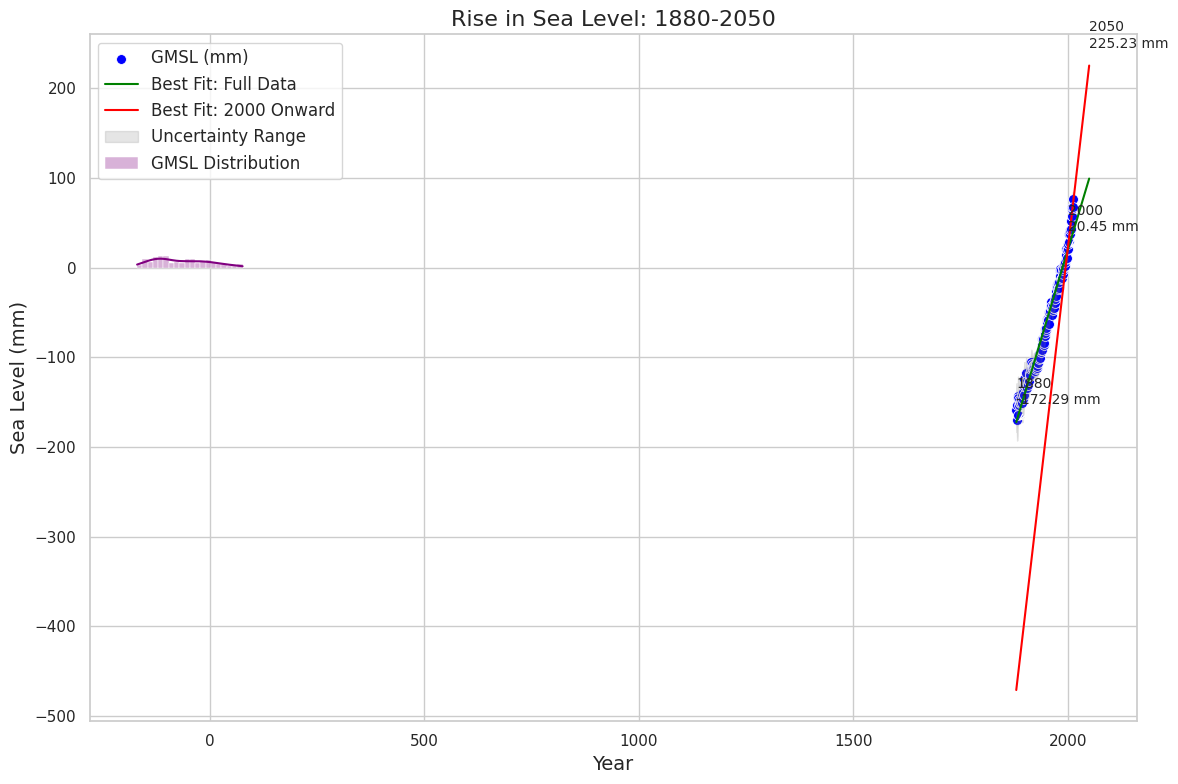

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import numpy as np
import pandas as pd

# Load the dataset
data = pd.read_csv("/content/sea_levels_2015.csv")

# Preprocessing: Extract year from the 'Time' column
data['Year'] = pd.to_datetime(data['Time']).dt.year
numeric_columns = ['GMSL', 'GMSL uncertainty']
data = data[['Year'] + numeric_columns].groupby('Year', as_index=False).mean()  # Aggregate by year

# Set the plot style
sns.set(style="whitegrid")

# Create the figure
fig, ax = plt.subplots(figsize=(12, 8))

# Scatter plot
sns.scatterplot(x=data['Year'], y=data['GMSL'], color="blue", s=50, label="GMSL (mm)", ax=ax)

# Line of best fit: full dataset
slope, intercept, _, _, _ = linregress(data['Year'], data['GMSL'])
years_extended = np.arange(data['Year'].min(), 2051)
line_full = slope * years_extended + intercept
ax.plot(years_extended, line_full, color="green", label="Best Fit: Full Data")

# Line of best fit: data from 2000 onward
data_recent = data[data['Year'] >= 2000]
slope_recent, intercept_recent, _, _, _ = linregress(data_recent['Year'], data_recent['GMSL'])
line_recent = slope_recent * years_extended + intercept_recent
ax.plot(years_extended, line_recent, color="red", label="Best Fit: 2000 Onward")

# Add uncertainty shading
ax.fill_between(
    data['Year'],
    data['GMSL'] - data['GMSL uncertainty'],
    data['GMSL'] + data['GMSL uncertainty'],
    color='gray',
    alpha=0.2,
    label='Uncertainty Range'
)

# Add annotations for key years
key_years = [1880, 2000, 2050]
for year in key_years:
    if year in years_extended:
        gmsl_value = slope * year + intercept if year < 2000 else slope_recent * year + intercept_recent
        ax.annotate(f"{year}\n{gmsl_value:.2f} mm",
                    xy=(year, gmsl_value),
                    xytext=(year, gmsl_value + 20),
                    arrowprops=dict(facecolor='black', arrowstyle='->'),
                    fontsize=10)

# Add histogram of GMSL values
sns.histplot(data['GMSL'], kde=True, color="purple", alpha=0.3, label="GMSL Distribution", bins=20)

# Labels, title, and legend
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Sea Level (mm)", fontsize=14)
ax.set_title("Rise in Sea Level: 1880-2050", fontsize=16)
ax.legend(loc="upper left", fontsize=12)

# Save and show the plot
plt.tight_layout()
plt.show()
